In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats

In [5]:
first_data = pd.read_csv('diabetes_data_upload.csv')

In [6]:
#Preview dataframe
first_data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [7]:
#change column name for 'class' and replace with column name = 'Diabetes Result'
first_data.rename(columns={'class': 'Diabetes Result'}, inplace=True)

In [8]:
first_data.shape

(520, 17)

In [9]:
first_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  Diabetes Result     520 no

In [10]:
#check for missing data
first_data.isna().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
Diabetes Result       0
dtype: int64

In [11]:
first_data.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


In [13]:
first_data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,Diabetes Result
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


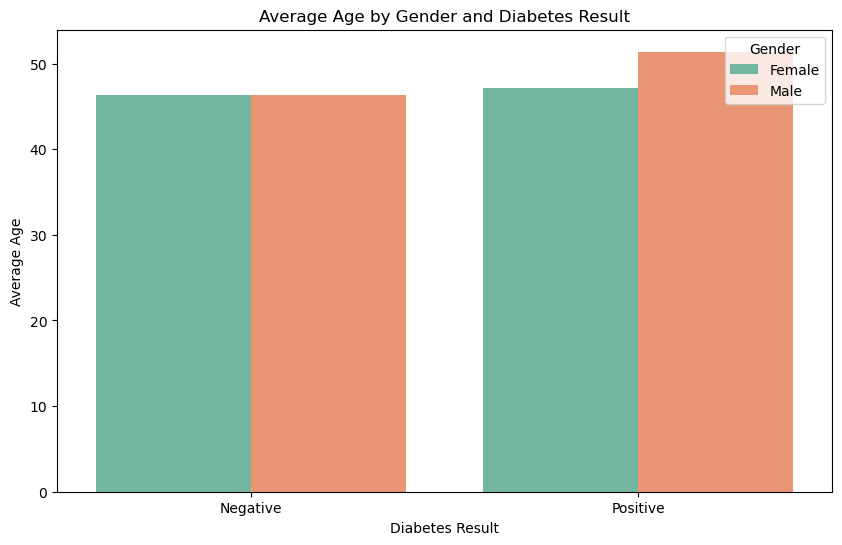

In [14]:
# Calculate the average age for each combination of gender and diabetes result
average_age_gender = first_data.groupby(['Gender', 'Diabetes Result'])['Age'].mean().reset_index()

#Visualize the Average Age by Gender and Diabetes Diagnoses by visualizing on a barplot
# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Diabetes Result', y='Age', hue='Gender', data=average_age_gender, palette='Set2')

# Add title and labels
plt.title('Average Age by Gender and Diabetes Result')
plt.xlabel('Diabetes Result')
plt.ylabel('Average Age')

# Show the plot
plt.show()

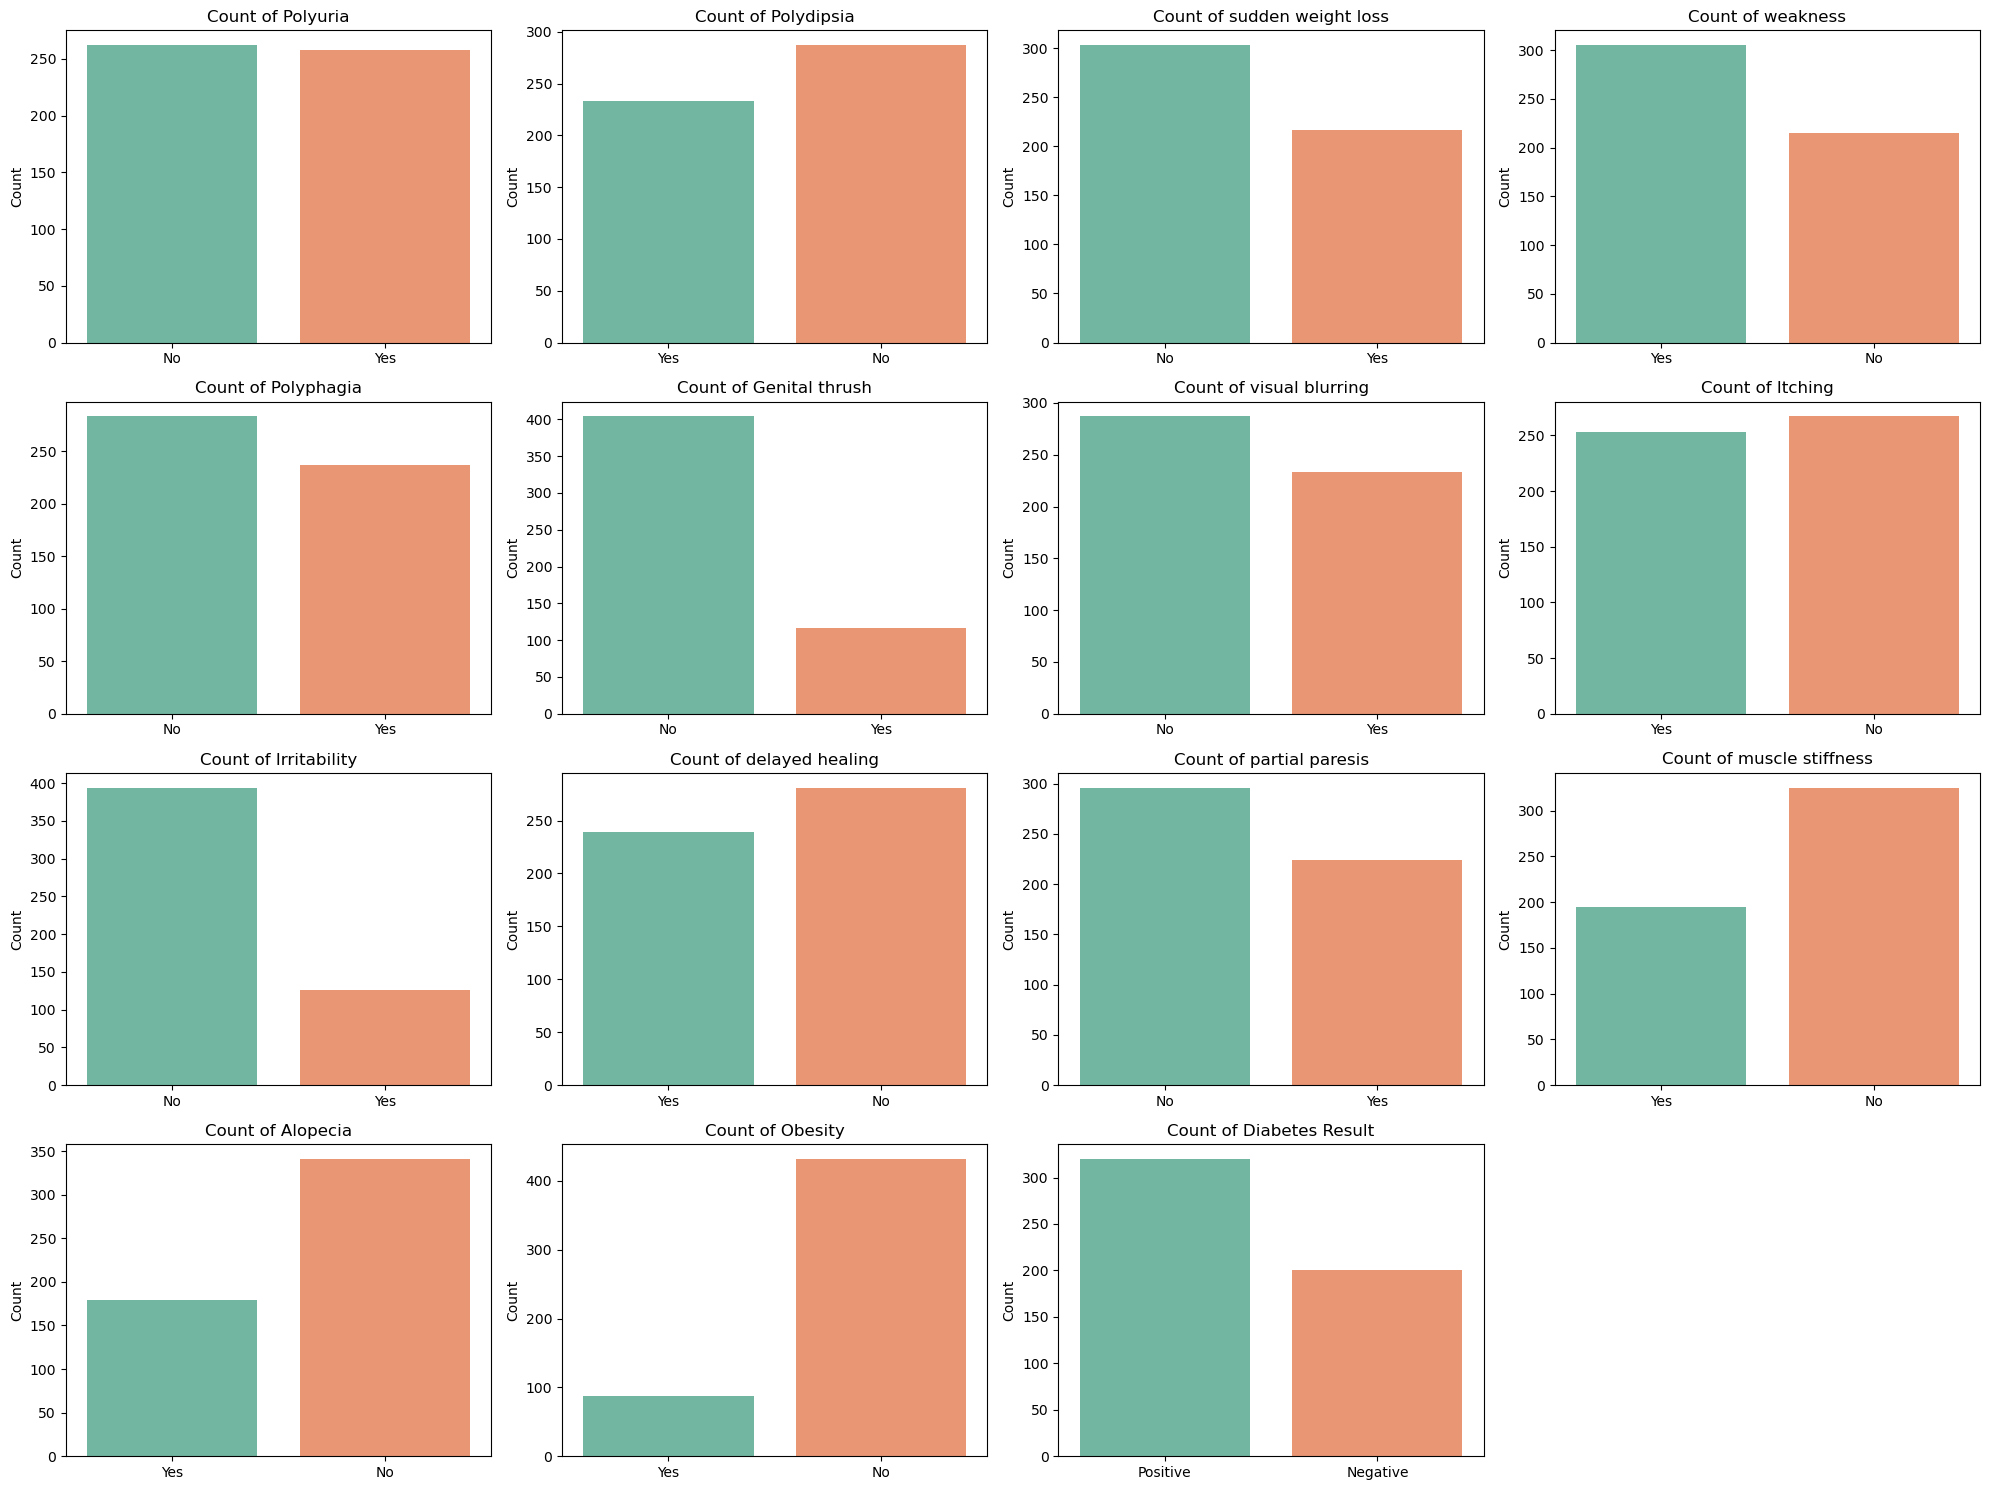

In [15]:
#Show a high level count bar plot for each symptom and diabetes diagnosis column(s)
categorical_columns = first_data.drop(columns=['Age', 'Gender']).columns

# Plot histograms for each categorical column
plt.figure(figsize=(20, 15))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(len(categorical_columns) // 4 + 1, 4, i)
    sns.countplot(x=column, data=first_data, palette='Set2')
    plt.title(f'Count of {column}')
    plt.xlabel('')
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [16]:
#Convert the DF so that all values are integers. 
mappings = {'Male': 0, 'Female': 1, 'Yes': 0, 
            'No': 1, 'Positive': 0, 
            'Negative': 1}
scored_data = first_data.replace(mappings)

In [17]:
scored_data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,Diabetes Result
0,40,0,1,0,1,0,1,1,1,0,1,0,1,0,0,0,0
1,58,0,1,1,1,0,1,1,0,1,1,1,0,1,0,1,0
2,41,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0
3,45,0,1,1,0,0,0,0,1,0,1,0,1,1,1,1,0
4,60,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [18]:
#confirm all dtypes are integers
scored_data.dtypes

Age                   int64
Gender                int64
Polyuria              int64
Polydipsia            int64
sudden weight loss    int64
weakness              int64
Polyphagia            int64
Genital thrush        int64
visual blurring       int64
Itching               int64
Irritability          int64
delayed healing       int64
partial paresis       int64
muscle stiffness      int64
Alopecia              int64
Obesity               int64
Diabetes Result       int64
dtype: object

In [28]:
#make a statistic summary table that shows the mean, median, and mode to get insight for each features. 
df = pd.DataFrame(scored_data)

# Define a function to calculate mean, median, and mode
def calculate_summary_statistics(df, column):
    mean = df[column].mean()
    median = df[column].median()
    mode = df[column].mode()[0]  # mode() returns a Series, take the first mode if there are multiple
    return pd.Series({'Mean': mean, 'Median': median, 'Mode': mode})

# Initialize a DataFrame to hold the summary statistics
summary_statistics = pd.DataFrame()

# Calculate statistics for each binary categorical feature
for column in df.columns:  
    summary_statistics[column] = calculate_summary_statistics(df, column)

# Transpose to display columns as rows
summary_statistics = summary_statistics.T

# Display the summary statistics table
print(summary_statistics)

                         Mean  Median  Mode
Age                 48.028846    47.5  35.0
Gender               0.369231     0.0   0.0
Polyuria             0.503846     1.0   1.0
Polydipsia           0.551923     1.0   1.0
sudden weight loss   0.582692     1.0   1.0
weakness             0.413462     0.0   0.0
Polyphagia           0.544231     1.0   1.0
Genital thrush       0.776923     1.0   1.0
visual blurring      0.551923     1.0   1.0
Itching              0.513462     1.0   1.0
Irritability         0.757692     1.0   1.0
delayed healing      0.540385     1.0   1.0
partial paresis      0.569231     1.0   1.0
muscle stiffness     0.625000     1.0   1.0
Alopecia             0.655769     1.0   1.0
Obesity              0.830769     1.0   1.0
Diabetes Result      0.384615     0.0   0.0


In [19]:
scored_data.describe()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,Diabetes Result
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,48.028846,0.369231,0.503846,0.551923,0.582692,0.413462,0.544231,0.776923,0.551923,0.513462,0.757692,0.540385,0.569231,0.625000,0.655769,0.830769,0.384615
std,12.151466,0.483061,0.500467,0.497776,0.493589,0.492928,0.498519,0.416710,0.497776,0.500300,0.428892,0.498846,0.495661,0.484589,0.475574,0.375317,0.486973
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,47.500000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
#show a summary table below that groups gender by the ratio of binary responses for each symptom and diabetes diagnoses
#Notes: Male': 0, 'Female': 1, 'Yes': 0, 'No': 1, 'Positive': 0, and Negative': 1
df = pd.DataFrame(scored_data)

# Function to calculate count and percentage for binary features grouped by gender
def calculate_summary(df, feature_col):
    grouped = df.groupby('Gender')[feature_col].value_counts().unstack().fillna(0)
    percentages = (grouped.T / grouped.sum(axis=1)).T * 100
    summary_df = pd.concat([grouped, percentages], axis=1, keys=['Count', 'Percentage'])
    return summary_df

# Initialize a list to hold summary tables
summary_tables = []

# Calculate summary for each binary feature
for feature in df.columns[2:]:
    summary_table = calculate_summary(df, feature)
    summary_tables.append((feature, summary_table))

# Display summary tables
for feature, table in summary_tables:
    print(f"Summary for {feature}:")
    print(table)
    print()

Summary for Polyuria:
         Count      Percentage           
Polyuria     0    1          0          1
Gender                                   
0          129  199  39.329268  60.670732
1          129   63  67.187500  32.812500

Summary for Polydipsia:
           Count      Percentage           
Polydipsia     0    1          0          1
Gender                                     
0            108  220  32.926829  67.073171
1            125   67  65.104167  34.895833

Summary for sudden weight loss:
                   Count      Percentage           
sudden weight loss     0    1          0          1
Gender                                             
0                    102  226  31.097561  68.902439
1                    115   77  59.895833  40.104167

Summary for weakness:
         Count      Percentage           
weakness     0    1          0          1
Gender                                   
0          177  151  53.963415  46.036585
1          128   64  66.666667  33.3333

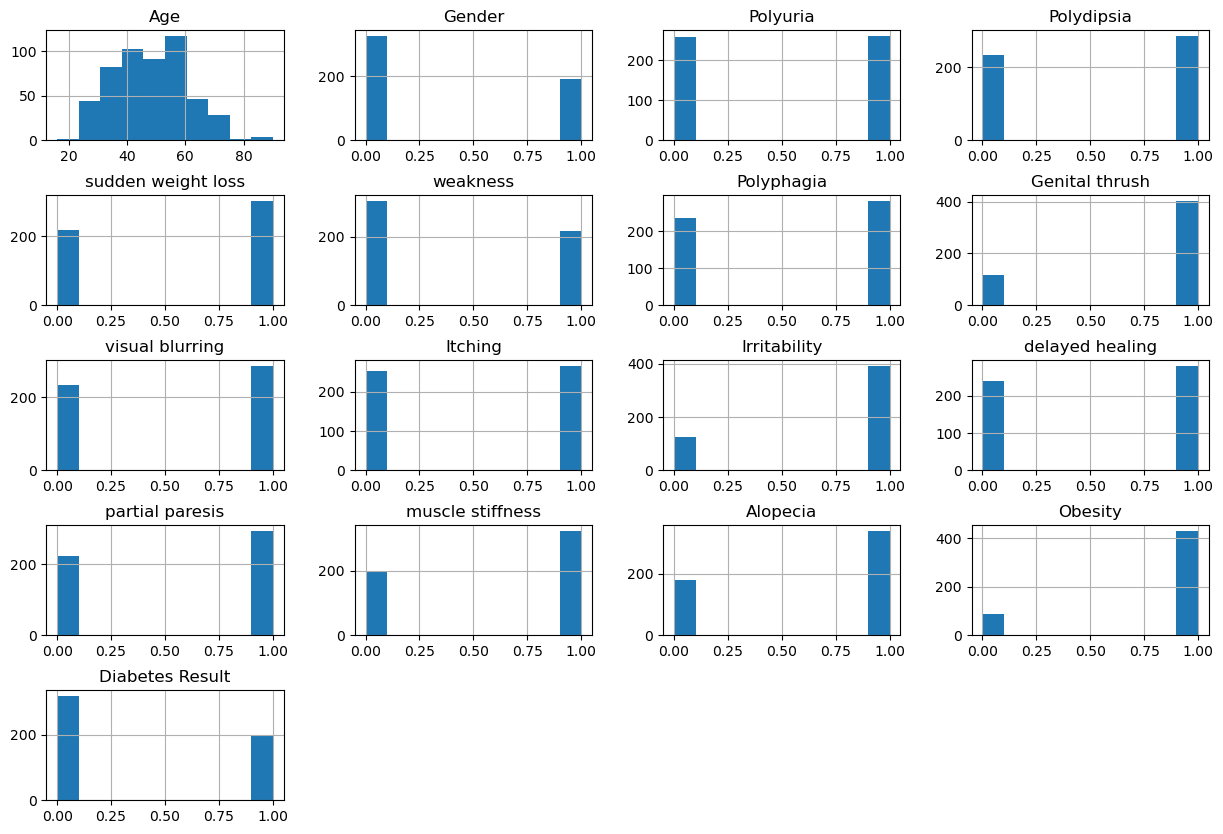

In [20]:
#visualize the distribution of all features based on the binary responses and age. 
scored_data.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5);